# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Importing the Train Dataset

In [2]:
insurance_churn_train = pd.read_csv('Insurance_Churn_ParticipantsData_Train.csv')

In [3]:
insurance_churn_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


# Data Wrangling

In [4]:
insurance_churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
feature_0     33908 non-null float64
feature_1     33908 non-null float64
feature_2     33908 non-null float64
feature_3     33908 non-null float64
feature_4     33908 non-null float64
feature_5     33908 non-null float64
feature_6     33908 non-null float64
feature_7     33908 non-null int64
feature_8     33908 non-null int64
feature_9     33908 non-null int64
feature_10    33908 non-null int64
feature_11    33908 non-null int64
feature_12    33908 non-null int64
feature_13    33908 non-null int64
feature_14    33908 non-null int64
feature_15    33908 non-null int64
labels        33908 non-null int64
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


In [5]:
insurance_churn_train.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

In [6]:
insurance_churn_train.dtypes

feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7       int64
feature_8       int64
feature_9       int64
feature_10      int64
feature_11      int64
feature_12      int64
feature_13      int64
feature_14      int64
feature_15      int64
labels          int64
dtype: object

In [7]:
insurance_churn_train.shape

(33908, 17)

In [8]:
insurance_churn_train.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'labels'],
      dtype='object')

In [9]:
insurance_churn_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


## Correlation HeatMap

In [10]:
insurance_churn_train_corr = insurance_churn_train.corr()
insurance_churn_train_corr

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
feature_0,1.000000,0.096391,-0.011224,-0.007262,0.003125,-0.021076,0.003105,-0.020858,-0.406850,-0.105244,-0.020580,-0.182078,-0.015597,0.028699,-0.040374,0.006381,0.019405
feature_1,0.096391,1.000000,0.005365,0.017720,-0.013162,0.004524,0.021292,0.018648,-0.000714,0.065006,-0.066072,-0.070495,-0.083485,-0.030686,0.015220,-0.021289,0.048611
feature_2,-0.011224,0.005365,1.000000,-0.031505,0.162574,-0.095046,-0.055874,0.023044,-0.006331,0.022440,0.012235,-0.027770,0.007430,-0.029314,-0.005105,0.084358,-0.033345
feature_3,-0.007262,0.017720,-0.031505,1.000000,-0.084617,0.001482,0.001489,0.000688,0.011788,0.003468,-0.010831,0.009210,-0.009263,-0.020733,0.006277,0.009662,0.392971
feature_4,0.003125,-0.013162,0.162574,-0.084617,1.000000,-0.091533,-0.045145,0.007676,-0.009894,0.004970,0.017115,-0.020753,0.005064,0.024970,-0.109652,0.105265,-0.075025
feature_5,-0.021076,0.004524,-0.095046,0.001482,-0.091533,1.000000,0.547919,-0.022786,0.017101,0.003437,-0.027930,0.122215,-0.022871,-0.243657,0.031530,-0.856851,0.106239
feature_6,0.003105,0.021292,-0.055874,0.001489,-0.045145,0.547919,1.000000,0.001753,0.019752,0.021266,-0.018799,0.039526,-0.010990,-0.176610,0.030134,-0.594264,0.119322
feature_7,-0.020858,0.018648,0.023044,0.000688,0.007676,-0.022786,0.001753,1.000000,0.058998,0.163618,-0.007553,-0.124799,-0.034169,-0.080982,-0.091335,0.009890,0.038588
feature_8,-0.406850,-0.000714,-0.006331,0.011788,-0.009894,0.017101,0.019752,0.058998,1.000000,0.108495,-0.005900,-0.014665,-0.046986,-0.035879,-0.005906,-0.015697,0.046193
feature_9,-0.105244,0.065006,0.022440,0.003468,0.004970,0.003437,0.021266,0.163618,0.108495,1.000000,-0.013744,-0.090923,-0.046003,-0.112665,-0.058534,-0.022458,0.068356


(17.0, 0.0)

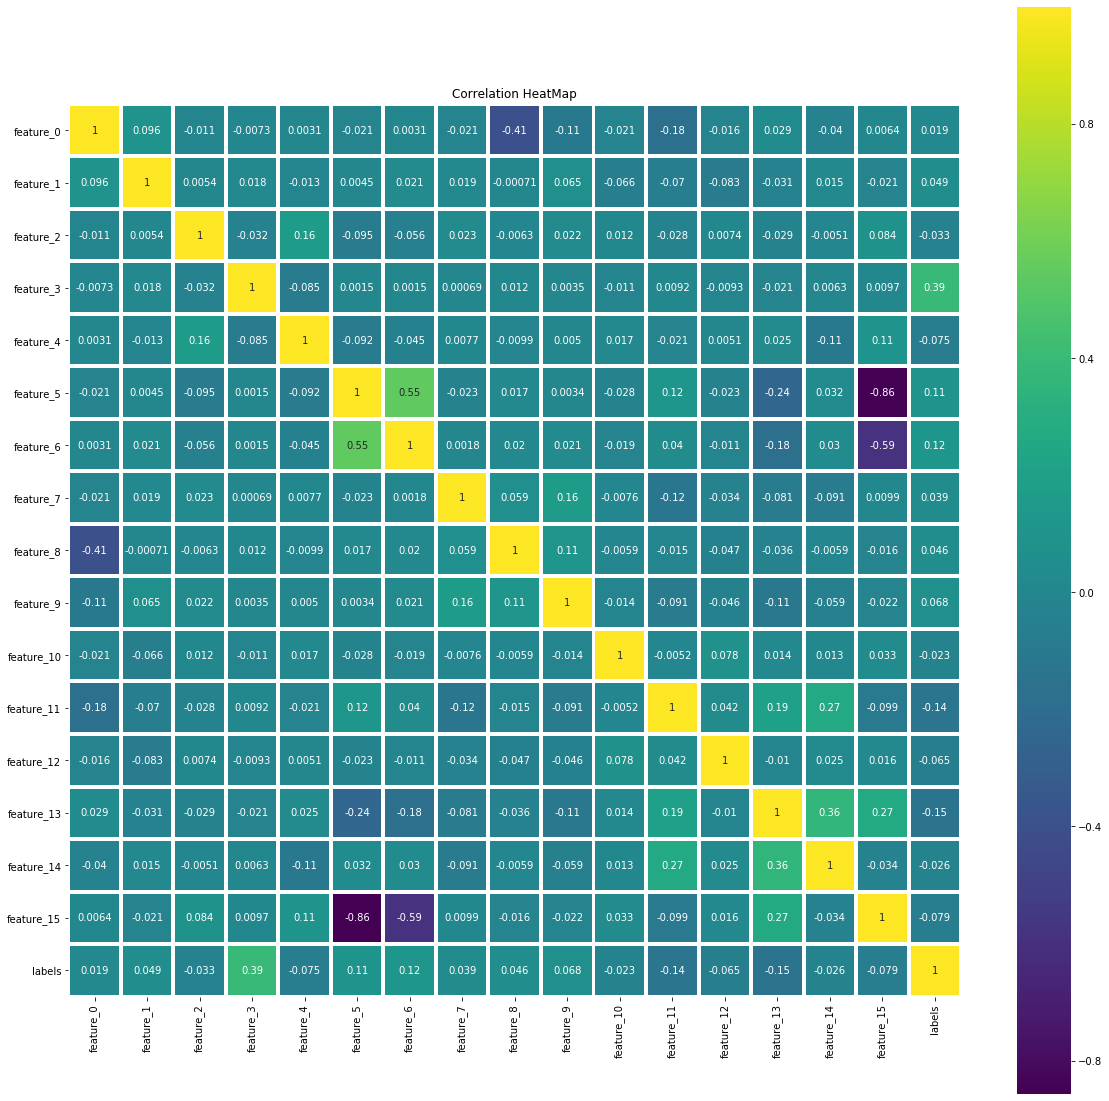

In [11]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(insurance_churn_train_corr, annot=True, cmap='viridis', linecolor ='white', square=1, linewidths=3)
plt.title('Correlation HeatMap')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [12]:
X = insurance_churn_train.iloc[:, :-1].values
y = insurance_churn_train.iloc[:, -1].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (33908, 16)
Shape of y: (33908,)


# Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [14]:
X_train

array([[-0.65321051,  0.59273783,  0.62404969, ...,  0.        ,
         9.        ,  3.        ],
       [ 1.79531291,  0.36677379, -0.09689757, ...,  2.        ,
         8.        ,  3.        ],
       [ 0.5710512 , -0.44741934,  0.62404969, ...,  0.        ,
         9.        ,  0.        ],
       ...,
       [ 1.70113894, -0.40045298,  0.38373394, ...,  2.        ,
         6.        ,  3.        ],
       [-1.31242835, -0.37582027, -0.21705545, ...,  0.        ,
         8.        ,  0.        ],
       [ 0.5710512 ,  0.35987663,  0.98452332, ...,  0.        ,
         5.        ,  3.        ]])

# Feature Scaling of the Train Dataset

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Importing the Test Dataset

In [16]:
insurance_churn_train_test = pd.read_csv('Insurance_Churn_ParticipantsData_Test.csv')

In [17]:
X_test_new = insurance_churn_train_test.iloc[:, :].values

In [18]:
X_test_new.shape

(11303, 16)

# Feature Scaling of the Test Dataset

In [19]:
X_test_new = sc.transform(X_test_new)

In [20]:
X_test_new

array([[ 0.57668471,  0.40636333,  0.9876633 , ..., -0.70851109,
         1.82343583,  0.44501173],
       [-1.12236487, -0.1660574 ,  0.50674505, ..., -0.70851109,
        -0.17365121, -1.5710865 ],
       [ 0.48229307,  0.1452189 , -0.57532102, ..., -0.70851109,
        -1.50504256,  0.44501173],
       ...,
       [-0.55601501,  0.36868251,  1.10789287, ..., -0.70851109,
         0.82489231,  0.44501173],
       [-0.65040665, -0.43899756,  0.14605636, ..., -0.70851109,
        -1.8378904 , -2.57913561],
       [-0.93358158, -0.07988302,  1.46858156, ...,  1.52496616,
         0.82489231,  0.44501173]])

# IMPLEMENTATION OF DIFFERENT MODELS

## 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier_logis = LogisticRegression(random_state = 0, solver='lbfgs')
classifier_logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred_logis = classifier_logis.predict(X_test)
print(np.concatenate((y_pred_logis.reshape(len(y_pred_logis),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [23]:
y_prob_logis = classifier_logis.predict_proba(X_test)
print(y_prob_logis)

[[0.9436108  0.0563892 ]
 [0.83957578 0.16042422]
 [0.96011125 0.03988875]
 ...
 [0.97266671 0.02733329]
 [0.97393843 0.02606157]
 [0.98280949 0.01719051]]


In [24]:
conf_matrix_logis = confusion_matrix(y_test, y_pred_logis)
print(conf_matrix_logis)
accuracy_score(y_test, y_pred_logis)

[[5848  117]
 [ 660  157]]


0.8854320259510469

In [25]:
scores_logis = cross_val_score(classifier_logis, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_logis))
print("Mean accuracy: {:.2f}" . format(scores_logis.mean()))
print("Standard Deviation: {:.2f}" . format(scores_logis.std()))

Cross-validation scores: [0.89341    0.88734886 0.89101902 0.88851202 0.89293615]
Mean accuracy: 0.89
Standard Deviation: 0.00


## 2. SVM

In [26]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred_svm = classifier_svm.predict(X_test)
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [28]:
y_prob_svm = classifier_svm.predict_proba(X_test)
print(y_prob_svm)

[[0.88619265 0.11380735]
 [0.87038139 0.12961861]
 [0.90243371 0.09756629]
 ...
 [0.90810433 0.09189567]
 [0.90772195 0.09227805]
 [0.90976383 0.09023617]]


In [29]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)
accuracy_score(y_test, y_pred_svm)

[[5965    0]
 [ 817    0]]


0.8795340607490416

In [30]:
scores_svm = cross_val_score(classifier_svm, X, y, cv=5, n_jobs=-1)
print("Cross-validation scores: {}" . format(scores_svm))
print("Mean accuracy: {:.2f}" . format(scores_svm.mean()))
print("Standard Deviation: {:.2f}" . format(scores_svm.std()))

Cross-validation scores: [0.88294265 0.88292539 0.8830556  0.8830556  0.8830556 ]
Mean accuracy: 0.88
Standard Deviation: 0.00


## 3. Kernel SVM

In [31]:
from sklearn.svm import SVC
classifier_ksvm = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier_ksvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=0, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
y_pred_ksvm = classifier_ksvm.predict(X_test)
print(np.concatenate((y_pred_ksvm.reshape(len(y_pred_ksvm),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [33]:
y_prob_ksvm = classifier_ksvm.predict_proba(X_test)
print(y_prob_ksvm)

[[0.93984153 0.06015847]
 [0.9254145  0.0745855 ]
 [0.93998195 0.06001805]
 ...
 [0.93434937 0.06565063]
 [0.94782213 0.05217787]
 [0.92492493 0.07507507]]


In [34]:
conf_matrix_ksvm = confusion_matrix(y_test, y_pred_ksvm)
print(conf_matrix_ksvm)
accuracy_score(y_test, y_pred_ksvm)

[[5868   97]
 [ 611  206]]


0.8956060159245061

In [35]:
scores_ksvm = cross_val_score(classifier_ksvm, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_ksvm))
print("Mean accuracy: {:.2f}" . format(scores_ksvm.mean()))
print("Standard Deviation: {:.2f}" . format(scores_ksvm.std()))

Cross-validation scores: [0.90328763 0.89737541 0.89868751 0.89677039 0.89603303]
Mean accuracy: 0.90
Standard Deviation: 0.00


## 4. Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
y_pred_nb = classifier_nb.predict(X_test)
print(np.concatenate((y_pred_nb.reshape(len(y_pred_nb),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [38]:
y_prob_nb = classifier_nb.predict_proba(X_test)
print(y_prob_nb)

[[0.97137184 0.02862816]
 [0.87100646 0.12899354]
 [0.99109007 0.00890993]
 ...
 [0.99579866 0.00420134]
 [0.99794278 0.00205722]
 [0.99667071 0.00332929]]


In [39]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix_nb)
accuracy_score(y_test, y_pred_nb)

[[5286  679]
 [ 452  365]]


0.8332350339132999

In [40]:
scores_nb = cross_val_score(classifier_nb, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_nb))
print("Mean accuracy: {:.2f}" . format(scores_nb.mean()))
print("Standard Deviation: {:.2f}" . format(scores_nb.std()))

Cross-validation scores: [0.83502875 0.8307284  0.83011355 0.83601239 0.83498009]
Mean accuracy: 0.83
Standard Deviation: 0.00


## 5. Decision Tree

In [41]:
param_grid = [{'max_depth':range(1,20), 'criterion':['gini','entropy'], 'min_samples_leaf':range(5,15)}]
print("List of grids: \n{}" . format(param_grid))

List of grids: 
[{'max_depth': range(1, 20), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(5, 15)}]


In [42]:
from sklearn.tree import DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X, y)
print("Best parameters: {}" . format(grid_search. best_params_))
print("Best cross-validation score: {:.2f}" . format(grid_search. best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 12}
Best cross-validation score: 0.90


In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 12, random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [44]:
y_pred_DT = classifier_DT.predict(X_test)
print(np.concatenate((y_pred_DT.reshape(len(y_pred_DT),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [45]:
y_prob_DT = classifier_DT.predict_proba(X_test)
print(y_prob_DT)

[[0.90874645 0.09125355]
 [0.94346667 0.05653333]
 [0.94346667 0.05653333]
 ...
 [0.67195767 0.32804233]
 [0.99395649 0.00604351]
 [0.99395649 0.00604351]]


In [46]:
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
print(conf_matrix_DT)
accuracy_score(y_test, y_pred_DT)

[[5767  198]
 [ 493  324]]


0.8981126511353583

In [47]:
scores_DT = cross_val_score(classifier_DT, X, y, cv=5, n_jobs=-1)
print("Cross-validation scores: {}" . format(scores_DT))
print("Mean accuracy: {:.2f}" . format(scores_DT.mean()))
print("Standard Deviation: {:.2f}" . format(scores_DT.std()))

Cross-validation scores: [0.90844759 0.89516367 0.9017844  0.8982451  0.89559062]
Mean accuracy: 0.90
Standard Deviation: 0.00


## 6. Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier
classifier_bag = BaggingClassifier(base_estimator=classifier_DT, n_estimators=100, random_state=100)
classifier_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=8,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=12,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
         

In [49]:
y_pred_bag = classifier_bag.predict(X_test)
print(np.concatenate((y_pred_bag.reshape(len(y_pred_bag),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [50]:
y_prob_bag = classifier_bag.predict_proba(X_test)
print(y_prob_bag)

[[0.92860029 0.07139971]
 [0.96790056 0.03209944]
 [0.9728851  0.0271149 ]
 ...
 [0.86033069 0.13966931]
 [0.98665983 0.01334017]
 [0.99329844 0.00670156]]


In [51]:
conf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
print(conf_matrix_bag)
accuracy_score(y_test, y_pred_bag)

[[5794  171]
 [ 496  321]]


0.9016514302565615

In [52]:
scores_bag = cross_val_score(classifier_bag, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_bag))
print("Mean accuracy: {:.2f}" . format(scores_bag.mean()))
print("Standard Deviation: {:.2f}" . format(scores_bag.std()))

Cross-validation scores: [0.91051157 0.90135653 0.90340658 0.9007521  0.90281669]
Mean accuracy: 0.90
Standard Deviation: 0.00


## 7. Ada_BOOST

In [53]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier(base_estimator=classifier_DT, n_estimators=100, random_state=100)
classifier_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=12,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=0,
                               

In [54]:
y_pred_ada = classifier_ada.predict(X_test)
print(np.concatenate((y_pred_ada.reshape(len(y_pred_ada),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [55]:
y_prob_ada = classifier_ada.predict_proba(X_test)
print(y_prob_ada)

[[0.7848909  0.2151091 ]
 [0.87393996 0.12606004]
 [0.88873962 0.11126038]
 ...
 [0.89793976 0.10206024]
 [0.80130376 0.19869624]
 [0.96277473 0.03722527]]


In [56]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print(conf_matrix_ada)
accuracy_score(y_test, y_pred_ada)

[[5711  254]
 [ 509  308]]


0.8874963137717488

In [57]:
scores_ada = cross_val_score(classifier_ada, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_ada))
print("Mean accuracy: {:.2f}" . format(scores_ada.mean()))
print("Standard Deviation: {:.2f}" . format(scores_ada.std()))

Cross-validation scores: [0.88677576 0.88911825 0.88806961 0.89352603 0.88939684]
Mean accuracy: 0.89
Standard Deviation: 0.00


## 8. XG-Boost

In [58]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred_xg = classifier_xg.predict(X_test)
print(np.concatenate((y_pred_xg.reshape(len(y_pred_xg),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [60]:
y_prob_xg = classifier_xg.predict_proba(X_test)
print(y_prob_xg)

[[0.98647326 0.01352673]
 [0.9205704  0.07942966]
 [0.9955993  0.00440069]
 ...
 [0.98709244 0.01290754]
 [0.9983323  0.00166765]
 [0.99884063 0.00115936]]


In [61]:
conf_matrix_xg = confusion_matrix(y_test, y_pred_ada)
print(conf_matrix_xg)
accuracy_score(y_test, y_pred_xg)

[[5711  254]
 [ 509  308]]


0.9050427602477146

In [62]:
scores_xg = cross_val_score(classifier_xg, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_xg))
print("Mean accuracy: {:.2f}" . format(scores_xg.mean()))
print("Standard Deviation: {:.2f}" . format(scores_xg.std()))

Cross-validation scores: [0.90638361 0.90622235 0.90458634 0.90237428 0.90591358]
Mean accuracy: 0.91
Standard Deviation: 0.00


## 9. Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 100)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [64]:
y_pred_rf = classifier_rf.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [65]:
y_prob_rf = classifier_rf.predict_proba(X_test)
print(y_prob_rf)

[[1.   0.  ]
 [0.86 0.14]
 [1.   0.  ]
 ...
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]]


In [66]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)
accuracy_score(y_test, y_pred_rf)

[[5805  160]
 [ 496  321]]


0.903273370687113

In [67]:
scores_rf = cross_val_score(classifier_rf, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_rf))
print("Mean accuracy: {:.2f}" . format(scores_rf.mean()))
print("Standard Deviation: {:.2f}" . format(scores_rf.std()))

Cross-validation scores: [0.90653103 0.90504276 0.90709335 0.90517623 0.90296416]
Mean accuracy: 0.91
Standard Deviation: 0.00


# Finding out the model with best cross-validation accuracy score

In [68]:
score_test_diff_model = {'Logistic':scores_logis.mean(), 'SVM':scores_svm.mean(), 'Kernel_SVM':scores_ksvm.mean(), 'Naive_Bayes':scores_nb.mean(), 'Decision_Tree':scores_DT.mean(), 'Bagging':scores_bag.mean(), 'AdaBoost':scores_ada.mean(), 'XGBoost':scores_xg.mean(), 'Random_Forest':scores_rf.mean()}

In [69]:
print("The mean cross-validation score for different model :\n\n", score_test_diff_model)

The mean cross-validation score for different model :

 {'Logistic': 0.89064520958986, 'SVM': 0.8830069662087532, 'Kernel_SVM': 0.8984307933736273, 'Naive_Bayes': 0.8333726357205313, 'Decision_Tree': 0.8998462746247556, 'Bagging': 0.9037686954821383, 'AdaBoost': 0.889377299224891, 'XGBoost': 0.9050960333412348, 'Random_Forest': 0.9053615070099639}


In [70]:
max_score = max(score_test_diff_model.values())
model_max_score = max(score_test_diff_model, key=score_test_diff_model.get) 
print("The model", model_max_score,"has the highest accuracy score of :", max_score) 

The model Random_Forest has the highest accuracy score of : 0.9053615070099639


# Fitting the model with best accuracy score on the Test Dataset to predict

## Predicted Value

In [71]:
y_pred_new_bag = classifier_rf.predict(X_test_new)
print(y_pred_new_bag)

[1 0 0 ... 0 0 0]


## Probability

In [72]:
y_prob_new_bag = classifier_rf.predict_proba(X_test_new)
print(y_prob_new_bag)

[[0.46 0.54]
 [0.71 0.29]
 [0.98 0.02]
 ...
 [0.9  0.1 ]
 [0.82 0.18]
 [1.   0.  ]]


# --------------------------------------------------------------------------------------------------------------